<a href="https://colab.research.google.com/github/ketkiambekar/masters-research-project/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd drive/MyDrive/KetkiAmbekar/Raw\ Data\ Files
%pwd

[Errno 2] No such file or directory: 'drive/MyDrive/KetkiAmbekar/Raw Data Files'
/content/drive/.shortcut-targets-by-id/1zDGtpS_EJdRSKz3jZptcq5k6f4jqXBwI/KetkiAmbekar/Raw Data Files


'/content/drive/.shortcut-targets-by-id/1zDGtpS_EJdRSKz3jZptcq5k6f4jqXBwI/KetkiAmbekar/Raw Data Files'

In [ ]:
#Load Dataset 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("NYC_housing_prices_dropped_na.csv",  parse_dates=True)
df.shape

(76842, 78)

In [ ]:
df.drop(['sales_date'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76842 entries, 0 to 76841
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               76842 non-null  int64  
 1   borough                  76842 non-null  object 
 2   neighborhood             76842 non-null  object 
 3   building_class_category  76842 non-null  object 
 4   tax_class                76842 non-null  object 
 5   block                    76842 non-null  int64  
 6   lot                      76842 non-null  int64  
 7   building_class_present   76842 non-null  object 
 8   address                  76842 non-null  object 
 9   zipcode                  76842 non-null  int64  
 10  ownername                76842 non-null  object 
 11  yearbuilt                76842 non-null  float64
 12  tax_class_sale           76842 non-null  int64  
 13  building_class_sale      76842 non-null  object 
 14  cd                    

In [ ]:
#Calculating the mutual information between the features. 

df1 = df.pop("sales_price")
df1

0        5585336
1        1643000
2        1200000
3         735000
4         775000
          ...   
76837     680000
76838     400000
76839     565000
76840     499500
76841     685000
Name: sales_price, Length: 76842, dtype: int64

In [ ]:
print(df.shape)
print(df1.shape)

(76842, 77)
(76842,)


(76842,)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
df1.index.resize(76842,1)
df1.shape

AttributeError: ignored

In [ ]:
mi_scores = make_mi_scores(df, df1)
mi_scores

KeyboardInterrupt: ignored

Lets create a Correlation Matrix. It will help us find if any column is espcecially indicative of the sales price. And it will allows us to check if any two features we that select are highly correlated to one another. We wish to choose features that are not highly correlated amongst themselves.

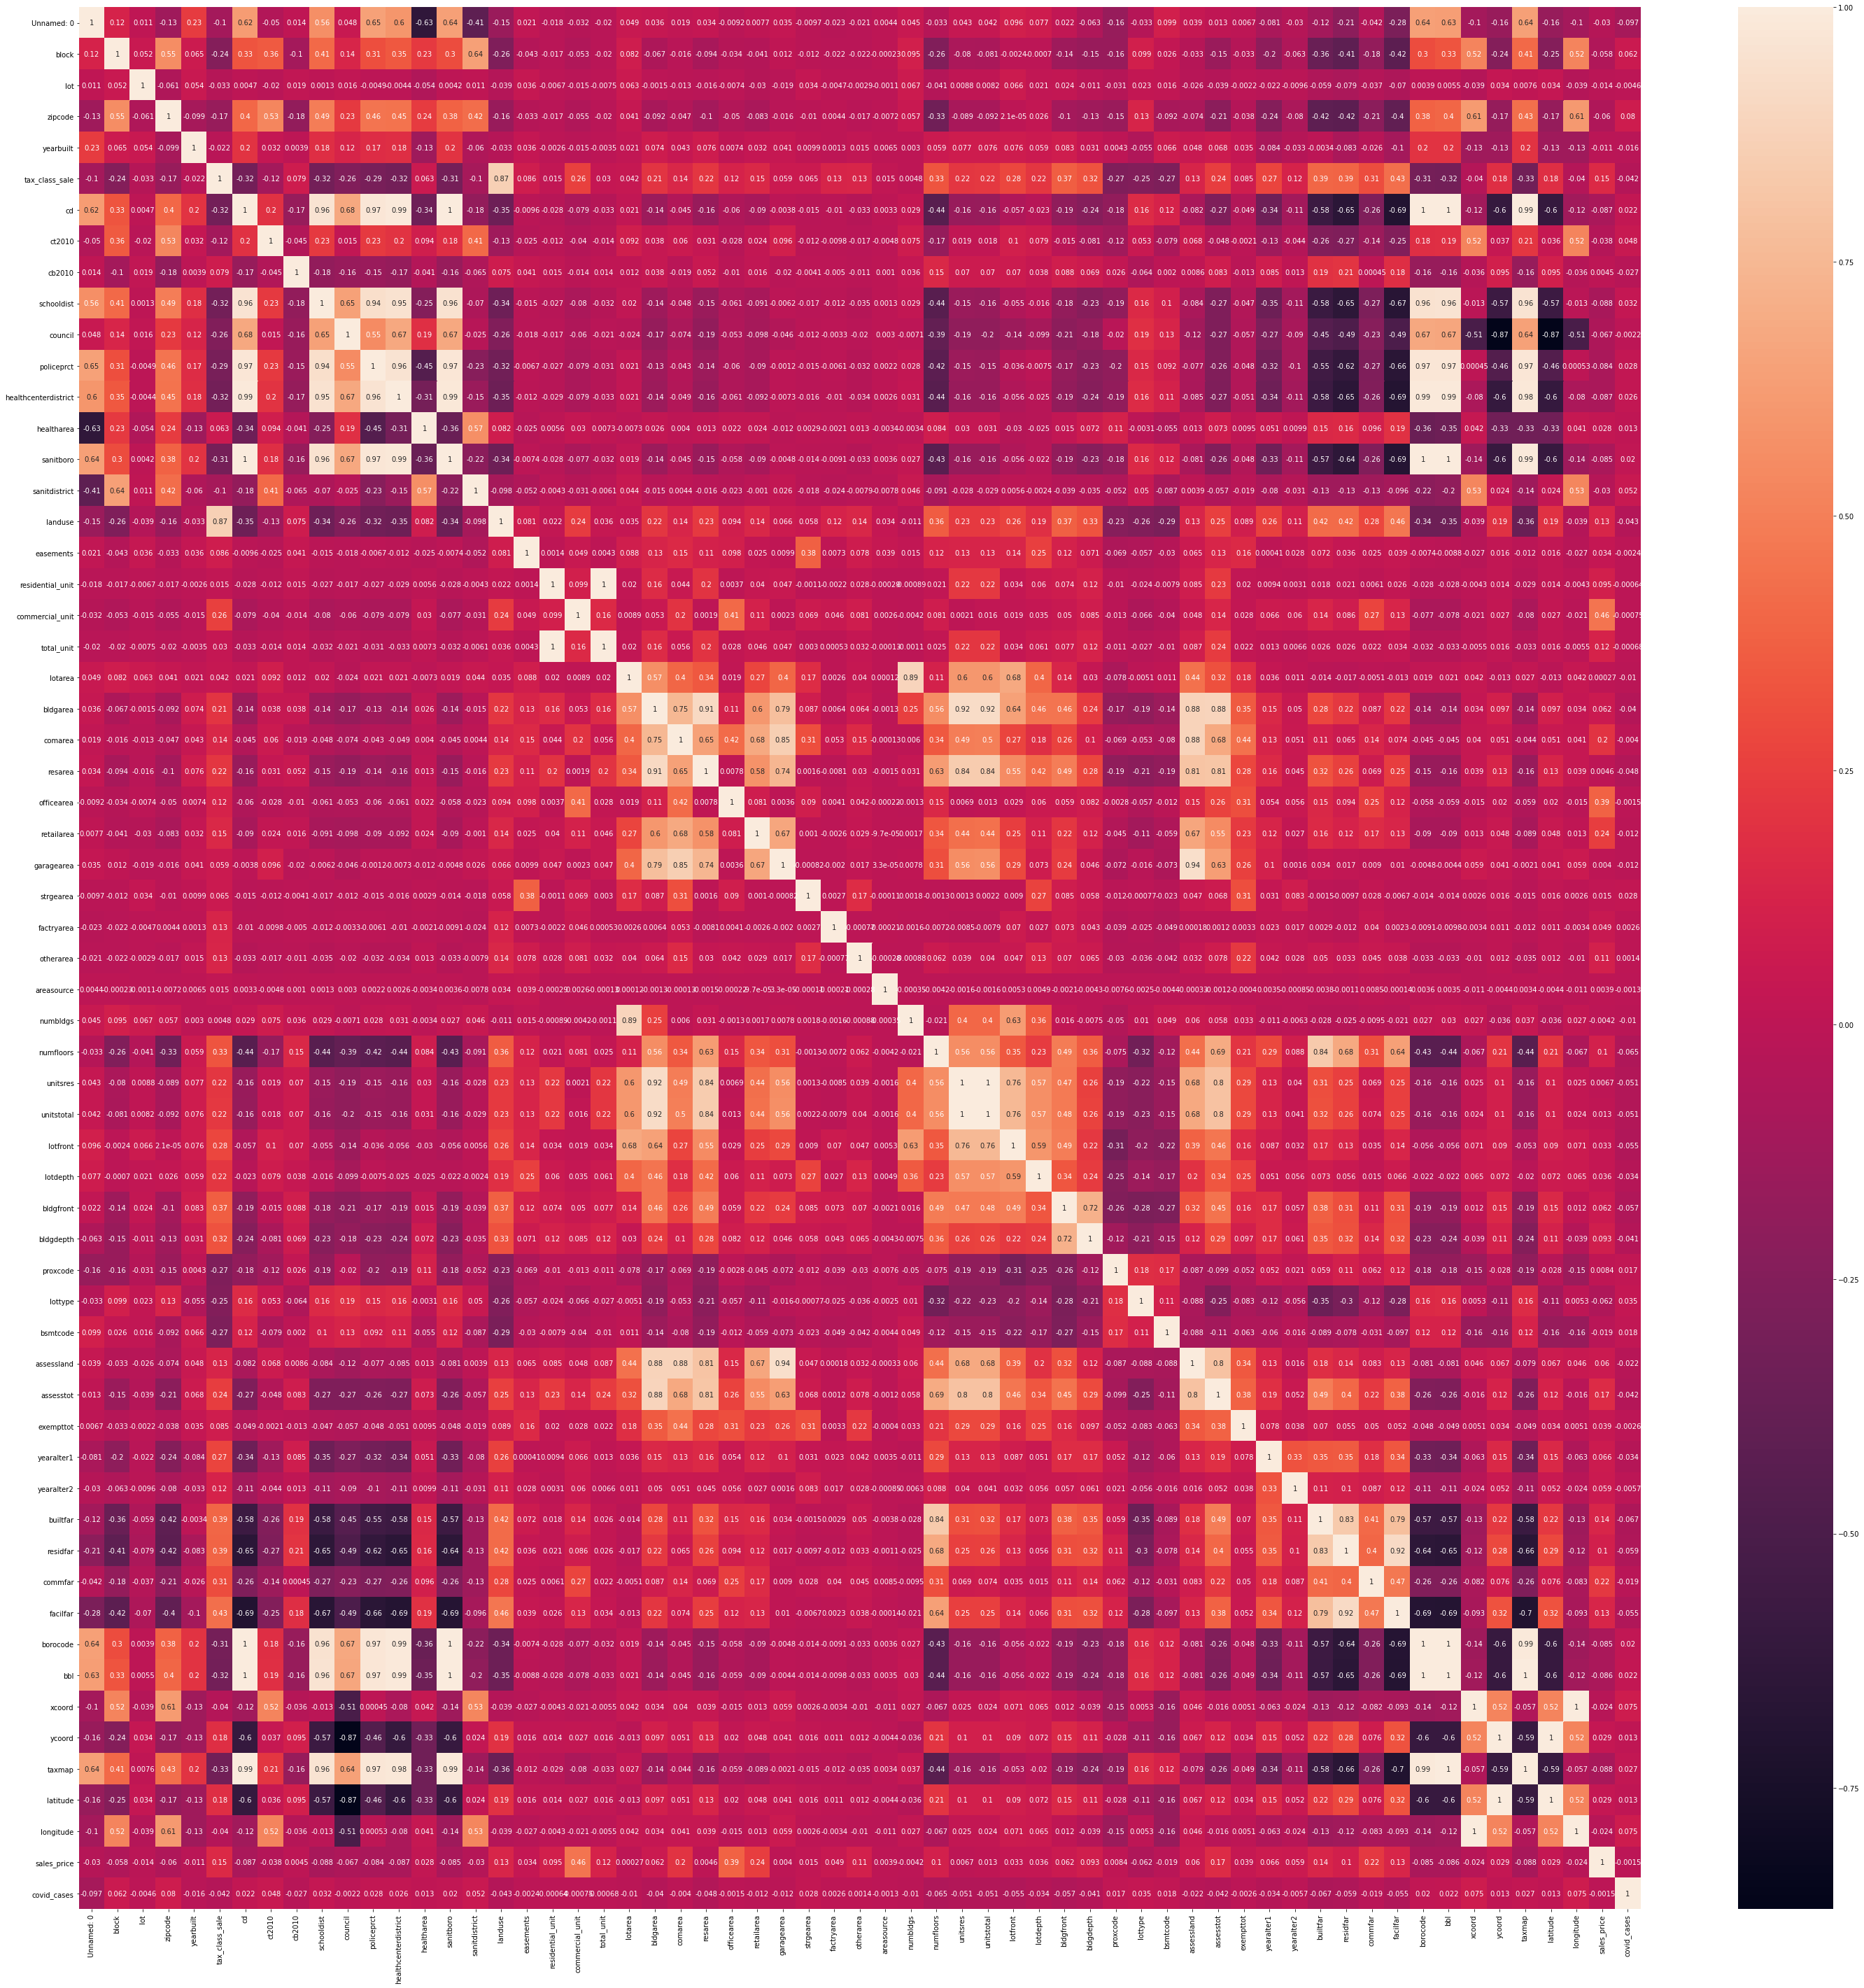

In [ ]:
#Correlation Matrix
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure (figsize=(50,50))
sn.heatmap(df.corr(), annot=True)
plt.show()

Final Chosen Features for first iteration of the model: <br>


1.   Boroughs (one hot encoded)
2.   Total Area ( New feature created by adding following features)

* lotarea                  
* bldgarea                 
* comarea                  
* resarea                  
* officearea               
* retailarea               
* garagearea               
* strgearea                
* factryarea      

3. Covid Cases
4. Sales Price










### Encoding 

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

In [ ]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.5MB/s 


In [ ]:
dff= df[['borough','lotarea','bldgarea','comarea','resarea','officearea','retailarea','garagearea','strgearea','factryarea', 'sales_price','sales_date','covid_cases']]
dff 

,borough,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,sales_price,sales_date,covid_cases
0,BK,7094.0,29772.0,0.0,29772.0,0.0,0.0,0.0,0.0,0.0,5585336,2020-08-31,1608
1,BK,2000.0,3600.0,0.0,2700.0,0.0,0.0,0.0,0.0,0.0,1643000,2020-08-31,1608
2,BK,1500.0,2994.0,0.0,2994.0,0.0,0.0,0.0,0.0,0.0,1200000,2020-08-31,1608
3,BK,2754.0,2205.0,0.0,1470.0,0.0,0.0,0.0,0.0,0.0,735000,2020-08-31,1608
4,BK,2000.0,3000.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,775000,2020-08-31,1608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76837,SI,2816.0,1224.0,0.0,1224.0,0.0,0.0,0.0,0.0,0.0,680000,2018-01-02,0
76838,SI,5900.0,2184.0,0.0,2184.0,0.0,0.0,0.0,0.0,0.0,400000,2018-01-02,0
76839,SI,2093.0,1404.0,0.0,1404.0,0.0,0.0,0.0,0.0,0.0,565000,2018-01-02,0
76840,SI,5325.0,600.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,499500,2018-01-02,0


In [ ]:
dff['tot_area']= dff['lotarea']+ dff['bldgarea']+ dff['comarea']+dff['resarea']+ dff['officearea']+dff['retailarea']+dff['garagearea']+dff['strgearea']+dff['factryarea']
dff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,borough,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,sales_price,sales_date,covid_cases,tot_area
0,BK,7094.0,29772.0,0.0,29772.0,0.0,0.0,0.0,0.0,0.0,5585336,2020-08-31,1608,66638.0
1,BK,2000.0,3600.0,0.0,2700.0,0.0,0.0,0.0,0.0,0.0,1643000,2020-08-31,1608,8300.0
2,BK,1500.0,2994.0,0.0,2994.0,0.0,0.0,0.0,0.0,0.0,1200000,2020-08-31,1608,7488.0
3,BK,2754.0,2205.0,0.0,1470.0,0.0,0.0,0.0,0.0,0.0,735000,2020-08-31,1608,6429.0
4,BK,2000.0,3000.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,775000,2020-08-31,1608,7000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76837,SI,2816.0,1224.0,0.0,1224.0,0.0,0.0,0.0,0.0,0.0,680000,2018-01-02,0,5264.0
76838,SI,5900.0,2184.0,0.0,2184.0,0.0,0.0,0.0,0.0,0.0,400000,2018-01-02,0,10268.0
76839,SI,2093.0,1404.0,0.0,1404.0,0.0,0.0,0.0,0.0,0.0,565000,2018-01-02,0,4901.0
76840,SI,5325.0,600.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,499500,2018-01-02,0,6525.0


In [ ]:
#One hot encoding
import category_encoders as ce
encoder=ce.OneHotEncoder(cols='borough',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(dff[['borough','tot_area', 'covid_cases', 'sales_date','sales_price']])
data_encoded


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,borough_BK,borough_BX,borough_MN,borough_QN,borough_SI,tot_area,covid_cases,sales_date,sales_price
0,1.0,0.0,0.0,0.0,0.0,66638.0,1608,2020-08-31,5585336
1,1.0,0.0,0.0,0.0,0.0,8300.0,1608,2020-08-31,1643000
2,1.0,0.0,0.0,0.0,0.0,7488.0,1608,2020-08-31,1200000
3,1.0,0.0,0.0,0.0,0.0,6429.0,1608,2020-08-31,735000
4,1.0,0.0,0.0,0.0,0.0,7000.0,1608,2020-08-31,775000
...,...,...,...,...,...,...,...,...,...
76837,0.0,0.0,0.0,0.0,1.0,5264.0,0,2018-01-02,680000
76838,0.0,0.0,0.0,0.0,1.0,10268.0,0,2018-01-02,400000
76839,0.0,0.0,0.0,0.0,1.0,4901.0,0,2018-01-02,565000
76840,0.0,0.0,0.0,0.0,1.0,6525.0,0,2018-01-02,499500


In [ ]:
#Save Df to csv

data_encoded.to_csv('NYC_HP_LSTM.csv')